# Data Mining Spring 2019, Project 2

## Imports and data preparation

In [0]:
import numpy as np
import pandas as pd
# visualization
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
#upload .csv file

from google.colab import files
uploaded = files.upload()

Saving crime.csv to crime.csv


In [9]:
df = pd.read_csv('crime.csv', encoding = 'ISO-8859-1')

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Getting to know the text

In [0]:
df.head()
print(df.dtypes)
df.columns.values

In [0]:
#preparing the shooting data

df.isnull().sum()/df.shape[0]
df['SHOOTING'].unique()
df['SHOOTING'].fillna('N')

## Crime Data Research

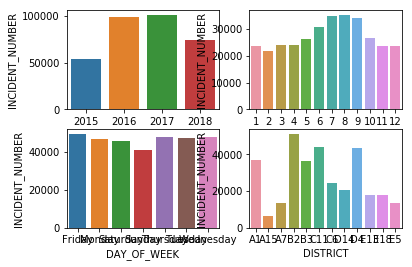

In [96]:
#plotting crimes numbers happening per year, month, day and district


plt.subplot(2,2,1)
vis_df = df.groupby('YEAR').count().reset_index()
vis_df = vis_df[['YEAR','INCIDENT_NUMBER']]
ax_year = sns.barplot(x='YEAR' ,y='INCIDENT_NUMBER',data=vis_df)

plt.subplot(2,2,2)
vis_df = df.groupby('MONTH').count().reset_index()
vis_df = vis_df[['MONTH','INCIDENT_NUMBER']]
ax_month = sns.barplot(x='MONTH' ,y='INCIDENT_NUMBER',data=vis_df)

plt.subplot(2,2,3)
vis_df = df.groupby('DAY_OF_WEEK').count().reset_index()
vis_df = vis_df[['DAY_OF_WEEK','INCIDENT_NUMBER']]
ax_day = sns.barplot(x='DAY_OF_WEEK' ,y='INCIDENT_NUMBER',data=vis_df)

plt.subplot(2,2,4)
vis_df = df.groupby('DISTRICT').count().reset_index()
vis_df = vis_df[['DISTRICT','INCIDENT_NUMBER']]
ax_dist = sns.barplot(x='DISTRICT' ,y='INCIDENT_NUMBER',data=vis_df)


In [97]:
#print the year with the most shootings
result = df.groupby(['YEAR', 'SHOOTING']).count().reset_index().max()
print(result.loc['YEAR'])


#print the district with the most shootings
result = df.groupby(['DISTRICT','SHOOTING']).count().reset_index().max()
print(test_df.loc['DISTRICT'])


2018
E5


In [0]:
#create DAY_OR_NIGHT column using the HOUR column

df["DAY_OR_NIGHT"] = df['HOUR'].apply(lambda x:'D' if x<18 and x>0 else 'N')
df.head()


In [42]:
#find when offenses happen the most, day or night

dayNight = df.groupby(['DAY_OR_NIGHT']).count().reset_index().max()
print(dayNight.loc['DAY_OR_NIGHT'])

#(most crimes happen at night)

N


In [47]:
#most common type of crime happening during the day

dayCrime =df.loc[ df['DAY_OR_NIGHT'] =='D']
maxDayCrime = dayCrime.groupby('OFFENSE_CODE_GROUP').count().reset_index().max()
print(maxDayCrime.loc['OFFENSE_CODE_GROUP'])


Warrant Arrests


## Clustering

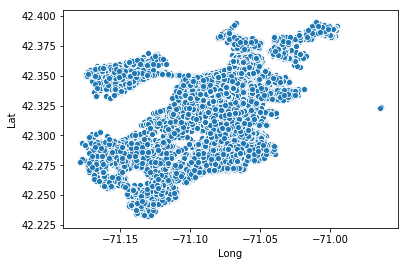

In [92]:
#imports, location preparation and first plotting test

#import libs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

#prepare locations dataframe
df[['Lat', 'Long']].head()
location = df[['Lat', 'Long']]
location = location.dropna()
locations = location.loc[ (location['Lat'] > 40 ) & (location['Long'] < -60)]

#seaborn test plot
ax = sns.scatterplot(x='Long', y='Lat', data=locations)


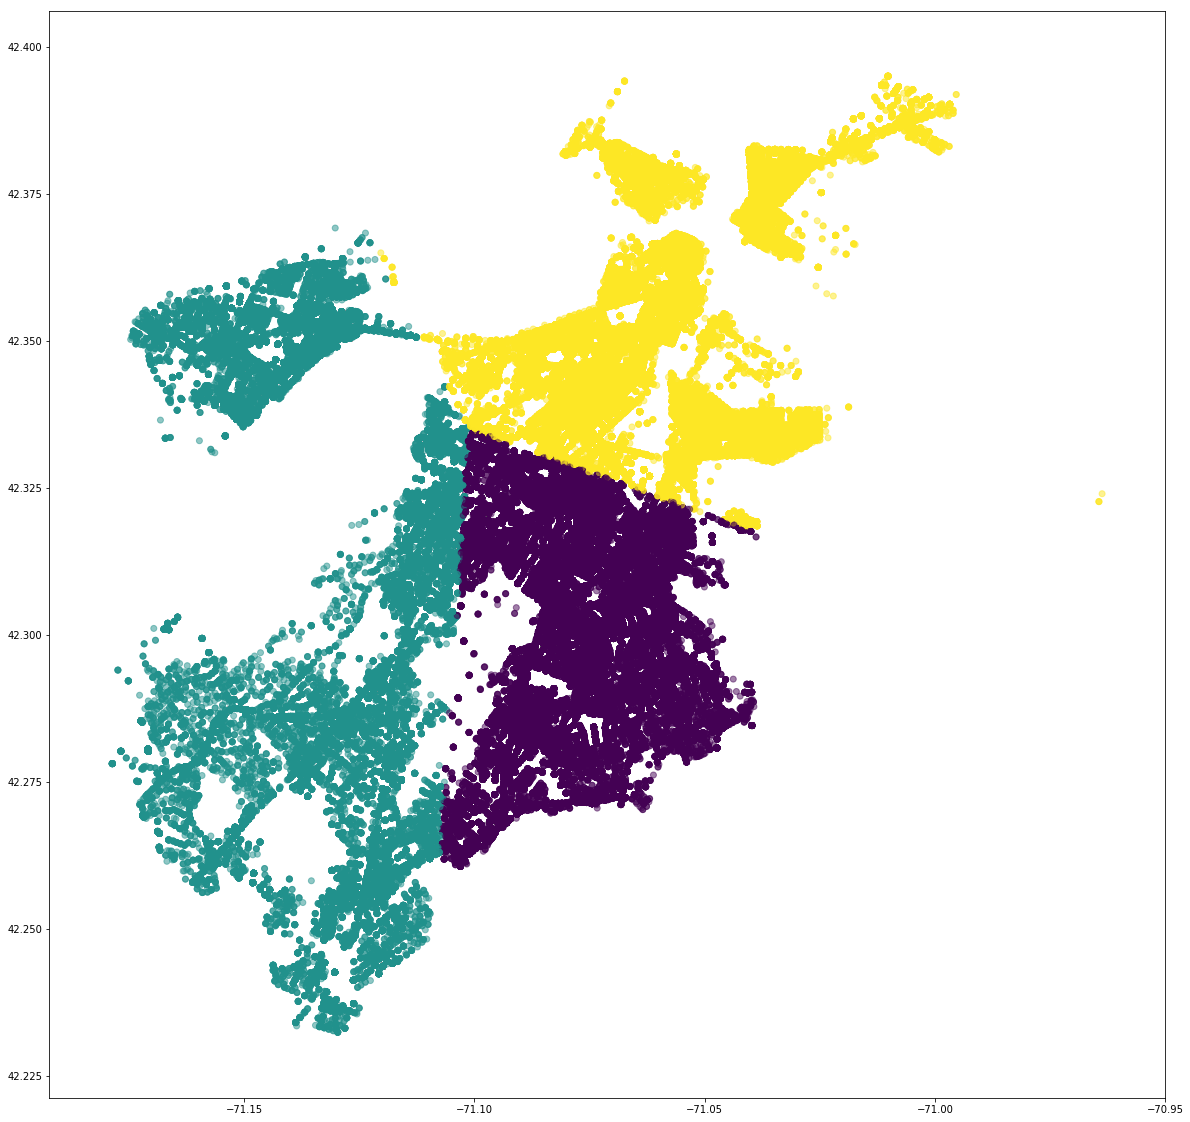

In [93]:
#KMeans clustering on location

#dataset
X = locations 
x=locations['Long']
y=locations['Lat']


km = KMeans(n_clusters=3)
km.fit(X)
Y = km.predict(X)
labels=km.labels_

#matplotlib plot

plt.figure(figsize =(20, 20))
plt.scatter(x, y, c=Y, alpha=0.5)
plt.show()





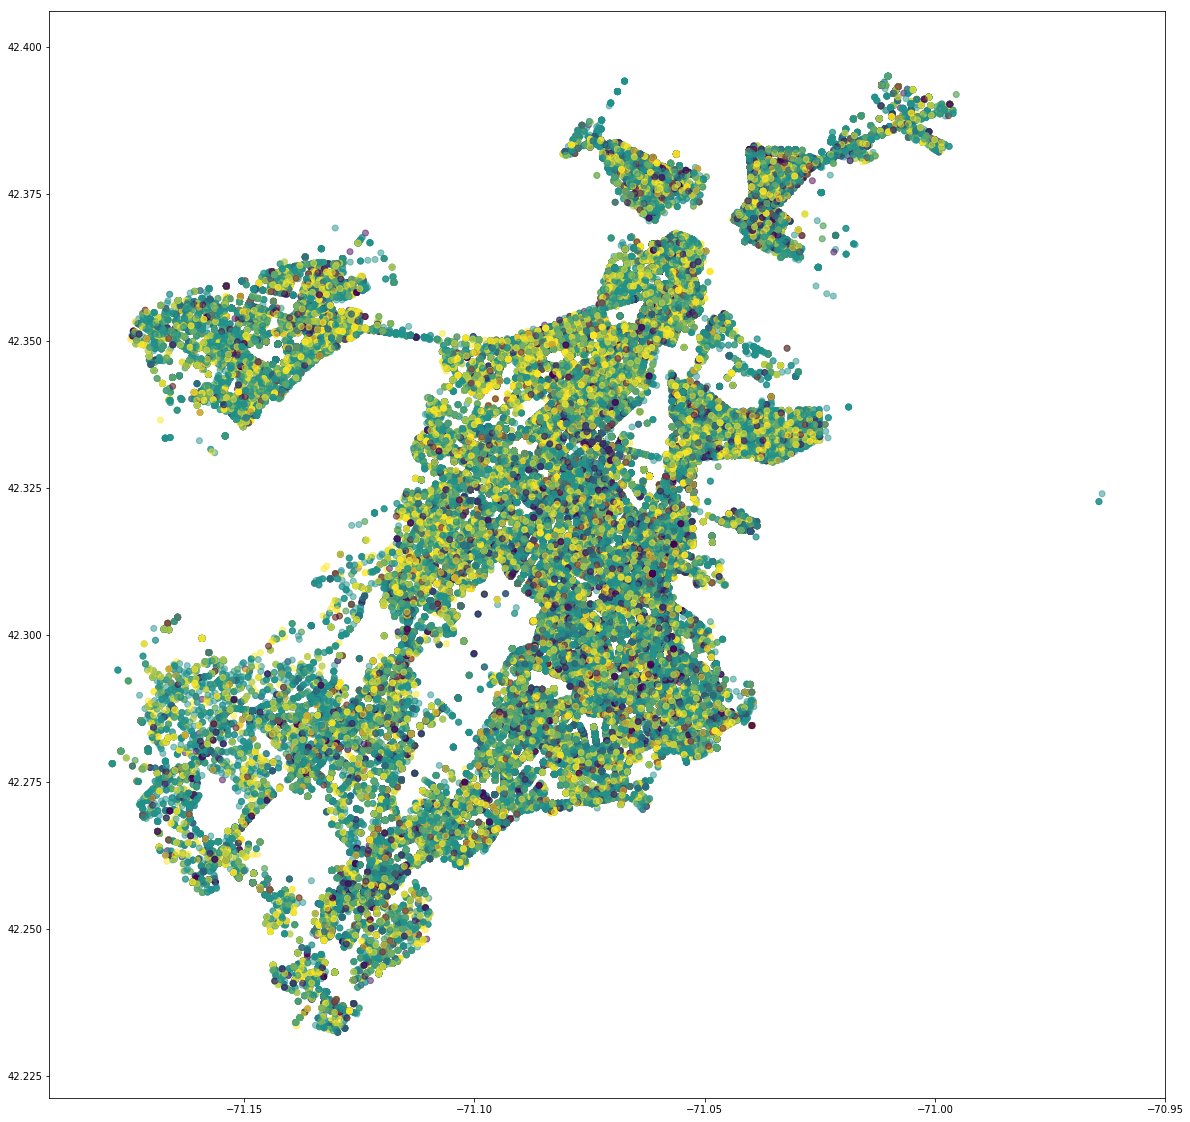

In [94]:
#use clustering on location and OFFENSE_CODE

#dataset
X = locations
X = X.join(df['OFFENSE_CODE'])
x=locations['Long']
y=locations['Lat']


#KMeans

km = KMeans(n_clusters=3)
km.fit(X)
Y = km.predict(X)
labels=km.labels_

#plotting
plt.figure(figsize =(20, 20))
plt.scatter(x, y, c=Y, alpha=0.5)
plt.show()


#(it seems that crimes of every offence code are spread all over the city and only at the centre there seems to be a slightly larger concentration of crimes of similar nature 
#(those assigned to the cluster of purple color))

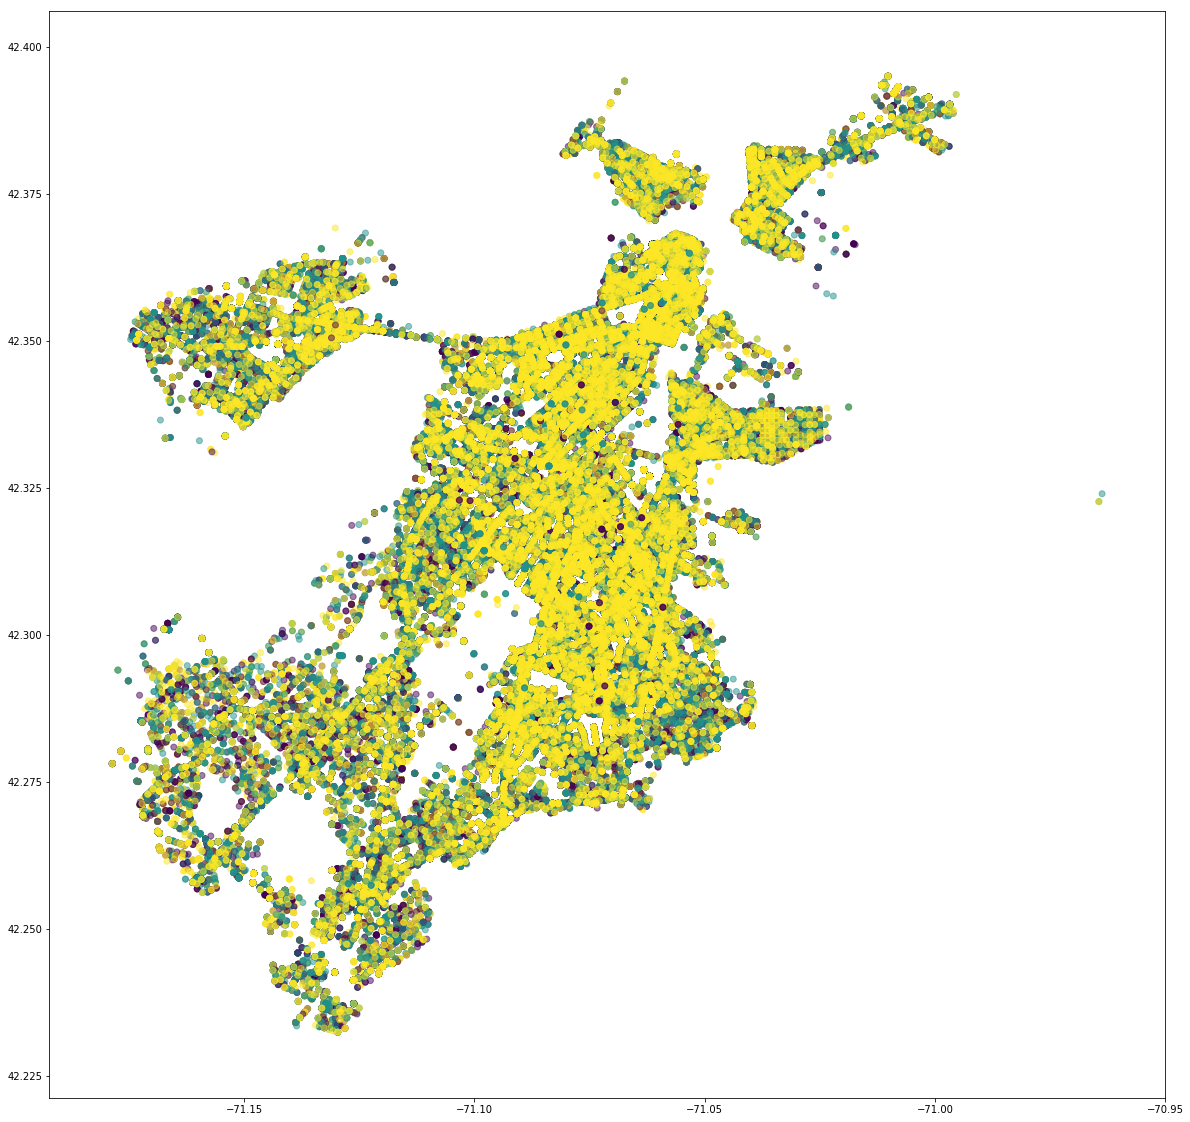

In [98]:
#use clustering on location and MONTH

#dataset
X = locations
X = X.join(df['MONTH'])
x=locations['Long']
y=locations['Lat']


#KMeans

km = KMeans(n_clusters=3)
km.fit(X)
Y = km.predict(X)
labels=km.labels_

#plotting
plt.figure(figsize =(20, 20))
plt.scatter(x, y, c=Y, alpha=0.5)
plt.show()

#(it seems like most of the crimes happen during more or less in a range of months close to each other around the center, while this is more varied as we are closer to the outskirts of the city,
#witch crime taking place during the course of the whole year)